# HW3: Regression and Classification

In this assignment you will preprocess the dataset and perform some basic regression and classification tasks. The learning outcome of this part is to know how one can pre-process a real-world dataset and perform a supervised learning task, and to understand some of the fundamental mechanisms behind these tasks.

### Student information
Please provide your information for automatic grading.

In [ ]:
STUD_SUID = 'alpa7946'
STUD_NAME = 'Alexander Pavlovic'
STUD_EMAIL = 'alexander.pavlovic01@gmail.com'

##  Grading: 

Pass/Fail.

To Pass this HW you need to provide a complete and correct solution, where one minor mistake is allowed. However, if your solution has more minor mistakes or lacks parts entirely or has one or more major mistakes, then you receive a Fail grade.

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

## Important instructions:

Each function you make will be considered during the grading, so it is important to strictly follow input and output instructions stated in the skeleton code.

You must not delete any of the given cells or change the structure of the cells or change the instructions in the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help in grading the assignment. Should you contravene this provision, you will fail the assignment, and no feedback will be given on the part after the contravention.

Some variable names are already given and have random values or empty arrays assigned on them. In this case you should only change the assignments on the variables but keep the names as given.

When you are finished with implementing all the tasks, **clear all outputs, run all cells again** (make sure there is no error) and submit!

Make sure that the results and figures asked are visible for us to grade.

Make sure not to modify the files in the "data" folder in your submission, and not to change the folder structure or the files location, or your submission will not obtain a passing grade.

To ensure consistent results, make sure that every operation in which you can use a random seed has it set to 8. If your process is correct, but the results are wrong due to the seed being wrong, it will be considered a major mistake.

In [ ]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

### `Task: Read the datasets using pandas. Use the files called cleveland.data and switzerland.data that you have downloaded in this archive.`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [ ]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.

columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

cleveland = pd.read_csv('../data/cleveland.data', header=None, names=columns, na_values=['?','!',-9.0])
test = pd.read_csv('../data/switzerland.data', header=None, names=columns, na_values=['?','!',-9.0])


In [ ]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1.0
2,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1.0
3,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2.0
4,38.0,0.0,4.0,110.0,0.0,0.0,0.0,156.0,0.0,0.0,2.0,NaN,3.0,1.0


In [ ]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,296.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.712838,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.938540,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [ ]:
# if you want to see information about the dataset, uncomment:
test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,122.000000,117.000000,117.000000,117.000000,117.0,46.000000,116.000000,117.000000,117.000000,117.000000,106.000000,5.000000,66.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,0.086957,0.353448,122.299145,0.435897,0.653846,1.801887,1.600000,5.772727,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,0.284885,0.593506,25.759921,0.498007,1.056061,0.623658,0.547723,1.743519,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,105.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,141.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


## *2.* Missing values

### `Task: Produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. The plot must have a name, and the bars must be named using the feature names.`

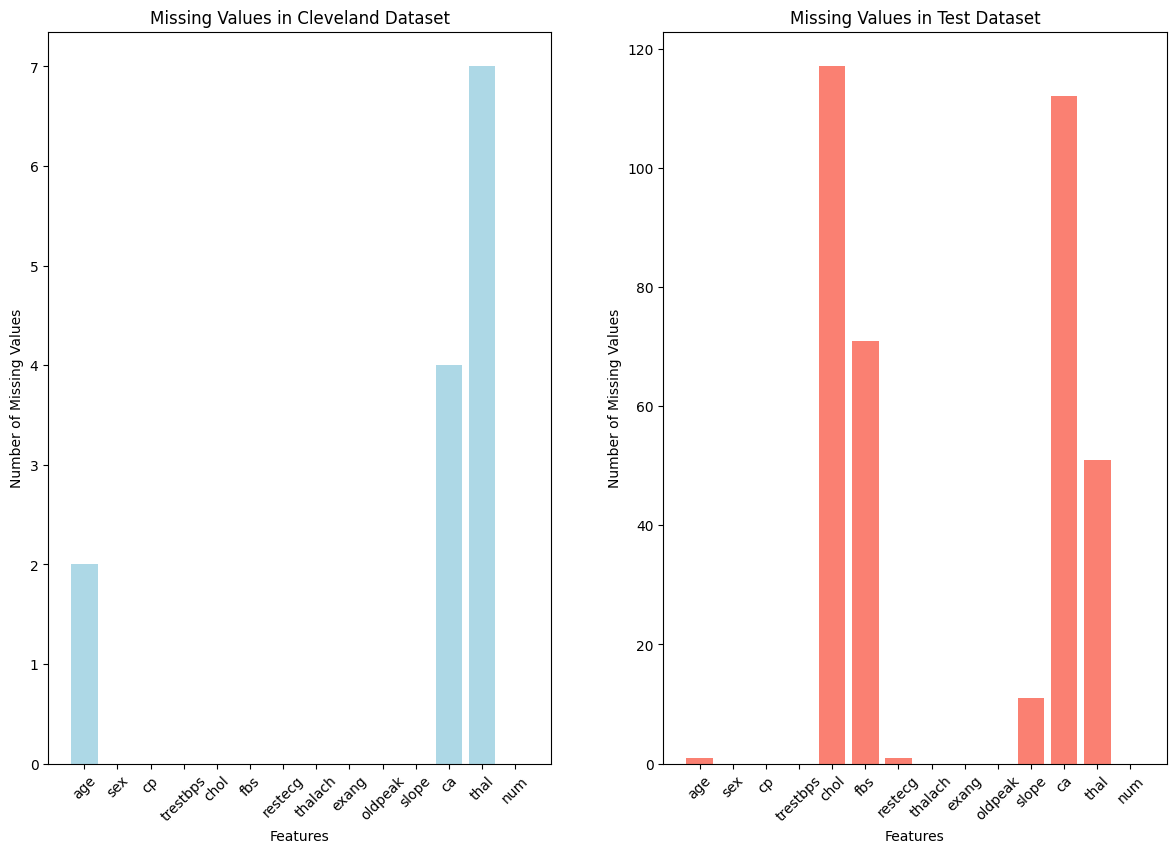

In [ ]:
# # # Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 
# # # subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# # # subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'

# # # Write your code here

test = test.drop(test.index[-5:])

test['chol'] = test['chol'].apply(lambda x: np.nan if x == 0 else x)
test['age'] = test['age'].apply(lambda x: np.nan if x < 0 or x > 120 else x)
test = test.apply(lambda col: pd.to_numeric(col, errors='coerce'))

cleveland['age'] = cleveland['age'].apply(lambda x: np.nan if x < 0 or x > 120 else x)
cleveland = cleveland.apply(lambda col: pd.to_numeric(col, errors='coerce'))

missing_cleveland = cleveland.isna().sum()
missing_test = test.isna().sum()

fig, ax = plt.subplots(1, 2, figsize=(13, 9))
fig.tight_layout(pad=5.0)

ax[0].bar(columns, missing_cleveland, color='lightblue')
ax[0].set_title('Missing Values in Cleveland Dataset')
ax[0].set_ylabel('Number of Missing Values')
ax[0].set_xlabel('Features')
ax[0].tick_params(axis='x', rotation=45)

ax[1].bar(columns, missing_test, color='salmon')
ax[1].set_title('Missing Values in Test Dataset')
ax[1].set_ylabel('Number of Missing Values')
ax[1].set_xlabel('Features')
ax[1].tick_params(axis='x', rotation=45)

plt.show()

## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [ ]:
#to many missing values in these features

cleveland = cleveland.drop(columns=['chol', 'ca'])
test = test.drop(columns=['chol', 'ca'])

cleveland = cleveland.reset_index(drop=True)
test = test.reset_index(drop=True)


categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

numerical_columns_int = ['age', 'trestbps', 'thalach']

numerical_columns_float = ['oldpeak']

cleveland[categorical_columns] = cleveland[categorical_columns].astype('object')
test[categorical_columns] = test[categorical_columns].astype('object')

cleveland[numerical_columns_int] = cleveland[numerical_columns_int].astype('Int64')
test[numerical_columns_int] = test[numerical_columns_int].astype('Int64')

cleveland[numerical_columns_float] = cleveland[numerical_columns_float].astype('float')
test[numerical_columns_float] = test[numerical_columns_float].astype('float')

### ` Task: Split the cleveland dataframe in a train and a validation set. `

The train set must be called train, the the validation set must be called val. The size of the validation set must be 30% of the total size of the cleveland dataframe. Use shuffle=True and stratify=True. Make sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [ ]:
# Split the data into X and y, where X contains the features and y contains the target variable.
y_cleveland = cleveland['num']
X_cleveland = cleveland.drop('num', axis=1)

y_test = test['num']
X_test = test.drop('num', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_cleveland, y_cleveland, test_size=0.3, random_state=RSEED, shuffle=True, stratify=y_cleveland)

X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)


In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,55,0.0,4.0,180,0.0,1.0,117,1.0,3.4,2.0,3.0
1,39,0.0,3.0,94,0.0,0.0,179,0.0,0.0,1.0,3.0
2,62,0.0,3.0,130,0.0,0.0,97,0.0,1.2,2.0,7.0
3,66,0.0,3.0,146,0.0,2.0,152,0.0,0.0,2.0,3.0
4,42,1.0,4.0,136,0.0,0.0,125,1.0,1.8,2.0,6.0


In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,thal
0,<NA>,1.0,4.0,140,0.0,2.0,170,0.0,1.2,2.0,7.0
1,57,1.0,3.0,150,0.0,0.0,174,0.0,1.6,1.0,3.0
2,60,0.0,3.0,120,1.0,0.0,96,0.0,0.0,1.0,3.0
3,68,0.0,3.0,120,0.0,2.0,115,0.0,1.5,2.0,3.0
4,64,1.0,3.0,140,0.0,0.0,158,0.0,0.0,1.0,3.0


In [ ]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.

y_train = y_train.apply(lambda y: 0 if y == 0 else 1)
y_val = y_val.apply(lambda y: 0 if y == 0 else 1)
y_test = y_test.apply(lambda y: 0 if y == 0 else 1)


In [ ]:
# DO NOT DELETE/CHANGE THIS CELL

'''
train_set_from_franco = pd.read_csv('../../../testing_data/train.csv')
val_set_from_franco = pd.read_csv('../../../testing_data/val.csv')

assert train.equals(train_set_from_franco), 'train set is not correct'
assert val.equals(val_set_from_franco), 'validation set is not correct'
'''


"\ntrain_set_from_franco = pd.read_csv('../../../testing_data/train.csv')\nval_set_from_franco = pd.read_csv('../../../testing_data/val.csv')\n\nassert train.equals(train_set_from_franco), 'train set is not correct'\nassert val.equals(val_set_from_franco), 'validation set is not correct'\n"

### ` Task: impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [ ]:
# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.

# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer

# Write your code here

train_cat = X_train[categorical_columns]
val_cat = X_val[categorical_columns]
test_cat = X_test[categorical_columns]

imputer = KNNImputer (n_neighbors=5, weights='distance')

train_imputed_knn = imputer.fit_transform(train_cat)
val_imputed_knn = imputer.transform(val_cat)
test_imputed_knn = imputer.transform(test_cat)

train_imputed_knn = pd.DataFrame(train_imputed_knn, columns = categorical_columns)
val_imputed_knn = pd.DataFrame(val_imputed_knn, columns = categorical_columns)
test_imputed_knn = pd.DataFrame(test_imputed_knn, columns = categorical_columns)

unique_values = [np.unique(train_cat[column]).tolist() for column in train_cat.columns]

def map_approximate_values(knn_values_imputed, unique_values_list): 
    for column in knn_values_imputed.columns:
        if column in train_cat.columns:
            values_for_column = unique_values_list[train_cat.columns.get_loc(column)]
            knn_values_imputed[column] = knn_values_imputed[column].apply(lambda value: min(values_for_column, key=lambda original: (abs(original - value), -original)) if pd.notna(value) else value)
    return knn_values_imputed

train_imputed = map_approximate_values(train_imputed_knn, unique_values)
val_imputed = map_approximate_values(val_imputed_knn, unique_values)
test_imputed = map_approximate_values(test_imputed_knn, unique_values)


train_imputed = train_imputed.astype("object")
val_imputed = val_imputed.astype("object")
test_imputed = test_imputed.astype("object")

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')
val_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')
test_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')

assert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'
assert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'
assert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'
'''

"\ntrain_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')\nval_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')\ntest_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')\n\nassert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'\nassert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'\nassert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'\n"

## *4.* Imputing numerical variables

### ` Task: impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

Exclude the columns with missing values when fitting your regressor: only train on columns without missing values. After a column has been imputed, it can be used to fit the regressor in the next step.

In [ ]:
# 1. Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = numerical_columns_int + numerical_columns_float

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.fit_transform(X_val[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])



train_num = X_train[numerical_columns]
val_num = X_val[numerical_columns]
test_num = X_test[numerical_columns]

#separate rows with and without missing values
separate_missing_and_present = lambda df: (df[df.isna().any(axis=1)], df[~df.isna().any(axis=1)])

train_with_missing, train_without_missing = separate_missing_and_present(train_num)
val_with_missing, val_without_missing = separate_missing_and_present(val_num)
test_with_missing, test_without_missing = separate_missing_and_present(test_num)

#definee a funcktion to perform lasso imputation on missing values
def lasso_fill_missing(dataframe_with_missing, dataframe_without_missing):
    missing_count = dataframe_with_missing.isnull().sum().sort_values()
    
    #impute missing columns one at a time
    for column in missing_count.index[missing_count > 0]:
        filtered_df = dataframe_with_missing.drop(columns=[column]).dropna(axis=1)
        shared_columns = filtered_df.columns.intersection(dataframe_without_missing.columns)
        
        if not shared_columns.empty:
            x_data = dataframe_without_missing[shared_columns]
            y_data = dataframe_without_missing[column]
            lasso_model = Lasso(alpha=0.1, random_state=RSEED)
            lasso_model.fit(x_data, y_data)
            imputed_values = lasso_model.predict(filtered_df[shared_columns])
            dataframe_with_missing[column] = imputed_values
            
    return dataframe_with_missing

#iteratively appply lasso imputation until all missing values are filled
def iterative_lasso_imputation(df_with_missing, df_without_missing):
    while df_with_missing.isnull().any().any(): #repeat until no missing values remain
        df_with_missing = lasso_fill_missing(df_with_missing, df_without_missing)
    return df_with_missing

# perform iterative kasso imputation for all sets
train_num_imputed_lasso = iterative_lasso_imputation(train_with_missing, train_without_missing)
val_num_imputed_lasso = iterative_lasso_imputation(val_with_missing, val_without_missing)
test_num_imputed_lasso = iterative_lasso_imputation(test_with_missing, test_without_missing)

train_imputed_lasso = pd.concat([train_num_imputed_lasso, train_without_missing]).reset_index(drop=True)
val_imputed_lasso = pd.concat([val_num_imputed_lasso, val_without_missing]).reset_index(drop=True)
test_imputed_lasso = pd.concat([test_num_imputed_lasso, test_without_missing]).reset_index(drop=True)

print("Train missing values:", train_imputed_lasso.isnull().sum().sum())
print("Validation missing values:", val_imputed_lasso.isnull().sum().sum())
print("Test missing values:", test_imputed_lasso.isnull().sum().sum())




Train missing values: 0
Validation missing values: 0
Test missing values: 0


C:\Users\alexa\AppData\Local\Temp\ipykernel_21236\14849796.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_with_missing[column] = imputed_values
C:\Users\alexa\AppData\Local\Temp\ipykernel_21236\14849796.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_with_missing[column] = imputed_values
C:\Users\alexa\AppData\Local\Temp\ipykernel_21236\14849796.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')
val_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')
test_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')

assert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'
assert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'
assert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'
'''

"\ntrain_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')\nval_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')\ntest_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')\n\nassert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'\nassert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'\nassert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'\n"

## *5.* Classification with Decision Tree, using a single split 

In [ ]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

# Write your code here

X_train_imputed = pd.concat([train_imputed_knn.reset_index(drop=True), train_imputed_lasso.reset_index(drop=True)], axis=1)
X_val_imputed = pd.concat([val_imputed_knn.reset_index(drop=True), val_imputed_lasso.reset_index(drop=True)], axis=1)
X_test_imputed = pd.concat([test_imputed_knn.reset_index(drop=True), test_imputed_lasso.reset_index(drop=True)], axis=1)


print(X_test_imputed.isnull().sum())

sex         0
cp          0
fbs         0
restecg     0
exang       0
slope       0
thal        0
age         0
trestbps    0
thalach     0
oldpeak     0
dtype: int64


### ` Task: Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import f1_score
import time

hyperparameters = {'criterion':['gini','entropy'],
                   'max_depth': [3,5,7], 
                   'min_samples_split' : [2,5,10]}


# add missing steps here

performance = {}
param_grid_object = ParameterGrid(hyperparameters)

start = time.time() # DO NOT CHANGE/DELETE THIS LINE

for parameter_tree_combination in param_grid_object:
    # Add the missing steps here.
    tree = DT(**parameter_tree_combination, random_state=RSEED)
    tree.fit(X_train_imputed, y_train)
    y_tree = tree.predict(X_val_imputed)
    f1 = f1_score(y_val,y_tree, average='macro')
    performance[(tuple(sorted(parameter_tree_combination.items())))] = f1

end = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

Time elapsed to run the hyperparameter tuning with a single split:  0.05759787559509277


In [ ]:
# select the best performing hyperparameters
grid_search_tree = GridSearchCV(DT(random_state=RSEED), hyperparameters, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_tree.fit(X_train_imputed, y_train)

best_hyperparameters = grid_search_tree.best_params_


print('Best parameters for Decision Tree:', best_hyperparameters)
print('Average F1 score for Decision Tree:', grid_search_tree.cv_results_['mean_test_score'].mean())


Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}
Average F1 score for Decision Tree: 0.7426775839604947


In [ ]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.
X = pd.concat([X_train_imputed, X_val_imputed]).reset_index(drop=True)
y = pd.concat([y_train, y_val]).reset_index(drop=True)

# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
tree = DT(**best_hyperparameters, random_state=RSEED)
tree.fit(X, y)

# Predict the target variable for the test dataset.
y_test_pred = tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.
f1_test_single_split = f1_score(y_test, y_test_pred, average='macro')

print('F1 score on the test dataset:', f1_test_single_split)


F1 score on the test dataset: 0.43587270973963355


In [ ]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.43587270973963355)

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=RSEED)
performance_CV = {}
param_grid_object = ParameterGrid(hyperparameters)

start_CV = time.time()  # DO NOT CHANGE/DELETE THIS LINE

for i, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    for param_cv_combination in param_grid_object:
        tree = DT(**param_cv_combination, random_state=RSEED)
        tree.fit(X_train, y_train)
        y_val_predicted = tree.predict(X_val)
        f1_val = f1_score(y_val, y_val_predicted, average='macro')
        
        key = tuple(sorted(param_cv_combination.items()))
        if key not in performance_CV:
            performance_CV[key] = []

        performance_CV[key].append(f1_val)

end_CV = time.time()  # DO NOT CHANGE/DELETE THIS LINE

# Output the time elapsed
print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV)  # DO NOT CHANGE/DELETE THIS LINE

Time elapsed to run the hyperparameter tuning with Cross Validation:  0.30422353744506836


In [ ]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
best_hyperparameters_CV = {}
mean_cv_scores = {}

for key,val in performance_CV.items():
    mean_cv_scores[key] = sum(val)/len(val)
cv_score = max(mean_cv_scores.values())

for params, score in mean_cv_scores.items():
    if score == cv_score:
        best_hyperparameters_CV = dict(params)
        break

best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}

In [ ]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
# Call the fitted model final_tree.

# Write your code here
final_tree = DT(**best_hyperparameters_CV,random_state=RSEED)
final_tree.fit(X,y)

# Predict the target variable for the test dataset.
y_test_predicted = final_tree.predict(X_test_imputed)

# Write your code here

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.

# Write your code here

f1_test_CV = f1_score(y_test, y_test_predicted, average='macro')

In [ ]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

np.float64(0.4404347826086957)

## *7.* Interpretation of the results 

### ` Task: Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

The time for cross-validation (0.30 seconds) is longer than for a single split (0.07 seconds) because cross-validation involves training the model multiple times on different subsets of the data. Each fold acts as a test set at least once, increasing computation time compared to a single train-test split that trains and tests the model only once.

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

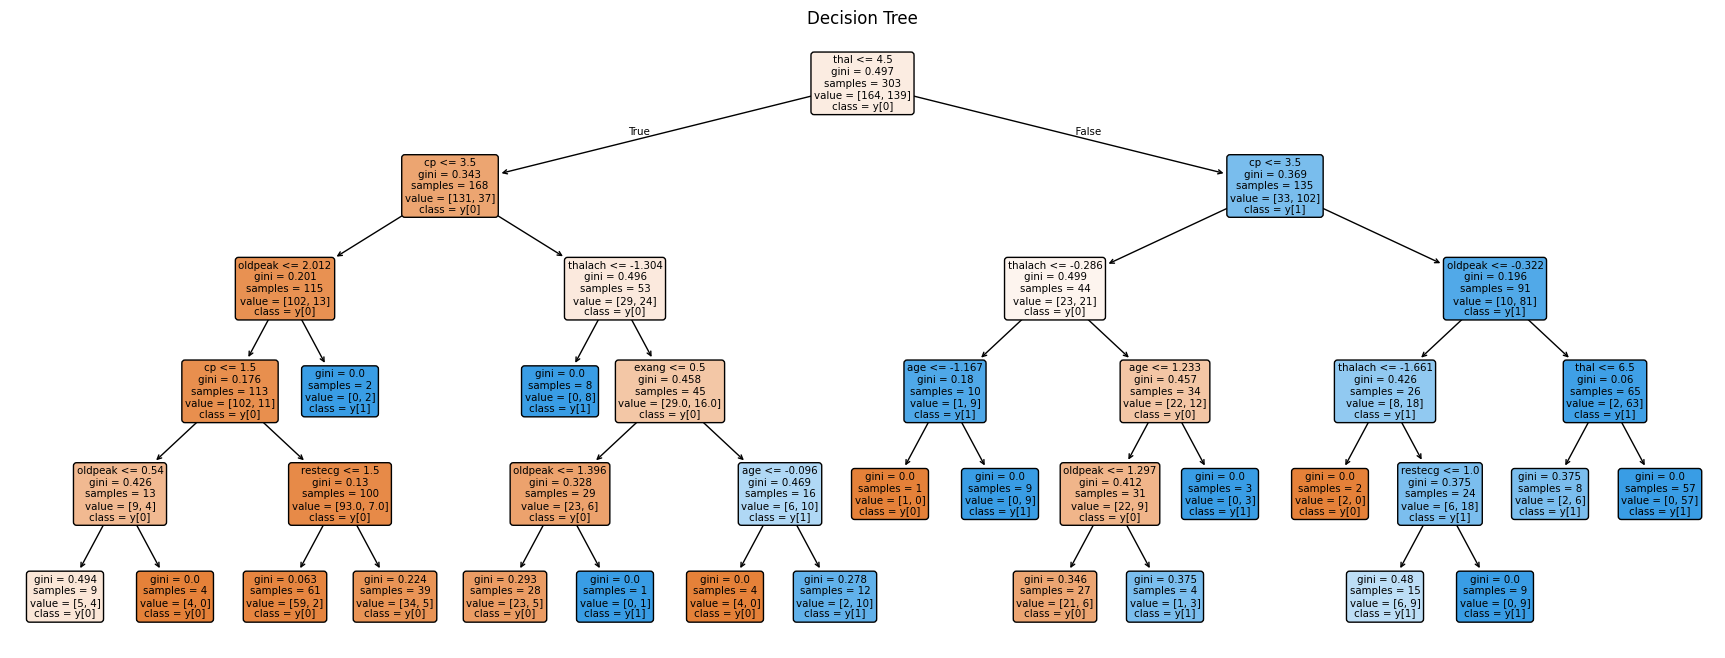

In [ ]:
# plot your tree here.
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(22, 8))
plot_tree(final_tree, 
          filled=True, 
          feature_names=X.columns,
          class_names=True,
          rounded=True)

plt.title('Decision Tree')
plt.show()

Thalis the most important feature because it is used for the initial split, indicating it provides the most significant information for classifying the data. This feature likely has the highest impact on reducing Gini impurity at the root node, meaning it effectively distinguishes between the classes early in the decision tree process. This initial split helps separate the data into meaningful subsets, making it a key factor in the model's decision-making process.